######################################################################################################################
### Hire Art : Coding Problem
#### PROBLEM STATMENT:
- The marketing ops team sent over this spreadsheet containing four years of data from a CRM system (please make a copy of the spreadsheet in order to manipulate the data): https://docs.google.com/spreadsheets/d/16hLtx8bBDe2GS1MOa3v9hY6Yhm4C30koLoCpiIJ5WDg/edit?usp=sharing. 

- The team wants to find the month they're likely to contact the most clients, so they can schedule a product upgrade announcement. Which month does the team tend to contact the greatest percentage of its clients?

- (In addition to providing an answer, please either include a public link to a spreadsheet showing your work, or describe your process for answering the question.)

######################################################################################################################


#### Import libraries as required

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

%matplotlib inline
import matplotlib.pyplot as plt

---------------------------------------------------------------------------------------------------------------------
- There is option to download google docs data, but as size of data is just 21KB, downloaded in manually and made a copy of it on local machine
- Data provided was in .xslx format, while saving I made it .csv format
---------------------------------------------------------------------------------------------------------------------


#### Let's read input .csv into a dataframe

In [56]:
df = pd.read_excel('../HireArt - Data Analyst Exercise 10.12.17.xlsx')
#print first 5 records from dataframe
df.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


#### Lets check dataframe information like column names, datatype etc.

In [57]:
df.info()  #we can just check for datatypes using df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
Account manager    1001 non-null object
Client Name        1001 non-null object
Date of Contact    1001 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.5+ KB


---------------------------------------------------------------------------------------------------------------------
- So as we are reading the excel data we can see that we have datetime64 format for Date of Contact. So we will read data in .csv to avoid further coversion issues . 
- When we will read the .csv file the datetime format will be automatically the object data type
---------------------------------------------------------------------------------------------------------------------
#### So lets read it .csv as dataframe

In [58]:
df = pd.read_csv('../HireArt - Data Analyst Exercise 10.12.17.csv')
df.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


In [59]:
df.isnull().values.any()

False

#### So, it shows that there are NO NULL values present in dataframe. So we have pretty clean dataset :-)

#### Now, lets get little more information about dataset

In [60]:
df.describe()

,Account manager,Client Name,Date of Contact
count,1001,1001,1001
unique,4,35,704
top,Milan Crona,Eichmann and Sons,2013-10-11
freq,286,38,7


---------------------------------------------------------------------------------------------------------------------
#### From above dataframe we can see that :
- Data of contact has 704 unique values
- Client Name has 35 unique values
- There are 4 Account Managers
- Maximum appearing top Account Manager is "Milan Crona"
- Maximum appearing top Client Name is "Eichmann and Sons"
- Maximum appearing top Date of Contact is "2013-10-11"
---------------------------------------------------------------------------------------------------------------------

So it seems october month might have maximum number of client contacted, but lets explore it more and see

#### So lets split first Date of contact into Month , Year and Date columns

In [61]:
df['Year'], df['Month'], df['Day'] = zip(*df['Date of Contact'].map(lambda x: x.split('-')))
df.head()

,Account manager,Client Name,Date of Contact,Year,Month,Day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,07
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,25


In [62]:
df.describe()

,Account manager,Client Name,Date of Contact,Year,Month,Day
count,1001,1001,1001,1001,1001,1001
unique,4,35,704,5,12,31
top,Milan Crona,Eichmann and Sons,2013-10-11,2014,10,19
freq,286,38,7,264,213,44


#### After splitting Date of Contact column, we can see that this has 5 Years of data and maximum appearing top year is 2014

#### As we need to find out the month they're likely to contact the most clients, so they can schedule a product upgrade announcement. Which month does the team tend to contact the greatest percentage of its client

- Lets first find out count of clients contacted per Month

In [63]:
df_month= df.groupby(['Month'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month

,Month,Number of Clients
9,10,213
8,09,121
7,08,79
5,06,77
11,12,77
4,05,69
6,07,66
10,11,65
1,02,64
0,01,60


#### lets plot the same using seaborn library

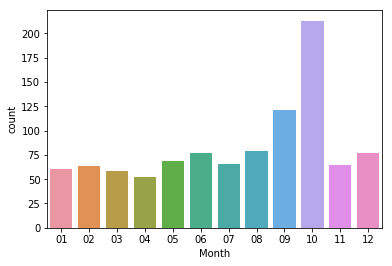

In [64]:
ax = sns.countplot(x="Month", data=df)

#### So, from above its clear that our first guess was right, maximum number of clients are contacted in month of October which is 213
#### Let's explore little more and find out year and month in which maximum number of clients are contacted

In [65]:
df_month_year = df.groupby(['Month','Year'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month_year

,Month,Year,Number of Clients
36,10,2013,60
37,10,2014,58
38,10,2015,53
39,10,2016,42
32,09,2014,33
35,09,2017,31
33,09,2015,29
34,09,2016,28
28,08,2014,25
20,06,2014,23


#### So, October 2013 maximum number of clients are contacted, but the count is 60 and we know that number of unique clients are 35

We need to find out the maximum unique clients contacted in which month rather than just having the maximum number contacted. It might be possible that same client contacted multiple times

In [66]:
df_month_year_client=df.groupby(['Month','Year','Client Name'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month_year_client

,Month,Year,Client Name,Number of Clients
588,10,2015,"Wyman, Farrell and Haag",7
507,10,2013,Donnelly-Champlin,6
540,10,2014,Eichmann and Sons,5
538,10,2014,"Denesik, Stehr and Carter",5
519,10,2013,"Kuhic, Stark and Kreiger",4
561,10,2015,Abbott Group,4
525,10,2013,Ondricka-Wolff,4
504,10,2013,"Brown, Wyman and Grimes",4
463,09,2016,"Anderson, Kutch and Hyatt",4
600,10,2016,"Hermiston, Armstrong and Balistreri",4


#### So yes, it is possible as we can see that, one client has been contacted multiple times for that perticular month and year

In [67]:
df_unique_client_month= df.groupby('Month')[('Client Name')].nunique().reset_index(name='Unique Client Count').sort_values(['Unique Client Count'], ascending=False)
df_unique_client_month

,Month,Unique Client Count
9,10,35
5,06,34
4,05,33
7,08,33
8,09,33
11,12,32
1,02,31
0,01,30
10,11,30
2,03,29


### Now we can confirm that Month October has maximum number of clients contacted

#### Lets find out percentage now

In [68]:
def perc_contact_clients():
    no_unique_clients_total = df['Client Name'].nunique()
    df_month = df.groupby('Month')
    no_of_clients = df_month['Client Name'].nunique()
    perc = (no_of_clients/no_unique_clients_total) * 100
    my_dict = {}
    j =0
    for i in df_month:
        my_dict[i[0]]=perc[j]
        j = j+1
    maximum = max(my_dict, key=my_dict.get)  
    print("The month to contact the most clients: \n",maximum)
    print(perc)

In [69]:
perc_contact_clients()

The month to contact the most clients: 
 10
Month
01     85.714286
02     88.571429
03     82.857143
04     74.285714
05     94.285714
06     97.142857
07     80.000000
08     94.285714
09     94.285714
10    100.000000
11     85.714286
12     91.428571
Name: Client Name, dtype: float64


#### Lets visualize the results now

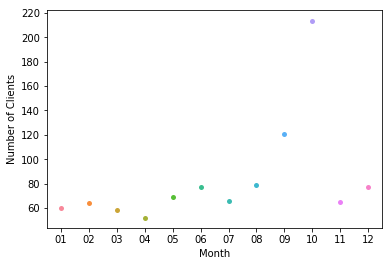

In [70]:
sns.stripplot(x="Month", y="Number of Clients", data=df_month);

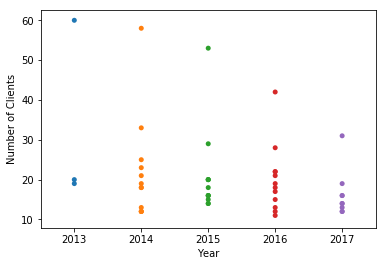

In [71]:
sns.stripplot(x="Year", y="Number of Clients", data=df_month_year);

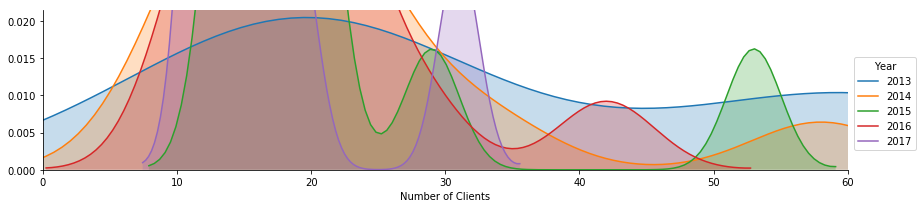

In [72]:
facet = sns.FacetGrid(df_month_year, hue="Year",aspect=4)
facet.map(sns.kdeplot,'Number of Clients',shade= True)
facet.set(xlim=(0, df_month_year['Number of Clients'].max()))
facet.add_legend()

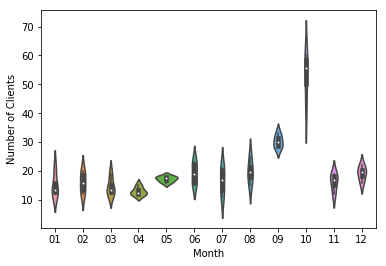

In [73]:
sns.violinplot(x="Month", y="Number of Clients", data=df_month_year);

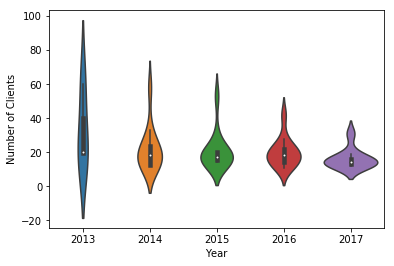

In [74]:
sns.violinplot(x="Year", y="Number of Clients", data=df_month_year);

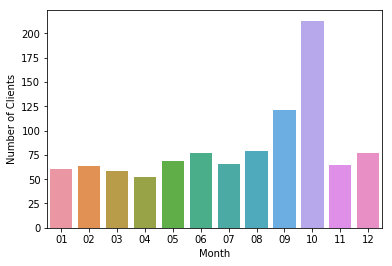

In [75]:
sns.barplot(x="Month", y="Number of Clients", data=df_month);

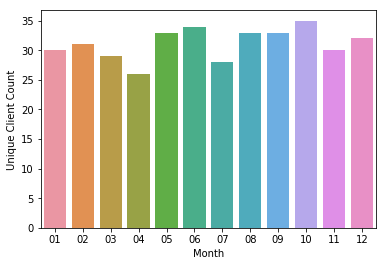

In [76]:
sns.barplot(x="Month", y="Unique Client Count", data=df_unique_client_month);

In [77]:
def perc_contact_clients_month_year():
    
    years = list(df.Year.unique())
    for y in years:
        df_year = df[df['Year'] == y]
        grouped = df_year.groupby(['Month'])
        no_of_clients = grouped['Client Name'].nunique()
        no_unique_clients_total = df_year['Client Name'].nunique()
        perc = (no_of_clients/no_unique_clients_total) * 100
        my_dict = {}
        j =0
        for i in grouped:
            my_dict[i[0]]=perc[j]
            j = j+1
        maximum = max(my_dict, key=my_dict.get)  
        print("In the year",y,"month in which max no of unique clients conatcted is:",maximum,"with",round(my_dict[maximum],4),"percentage ")
        plt.bar(range(len(my_dict)), list(my_dict.values()), align='center')
        plt.xticks(range(len(my_dict)), list(my_dict.keys()))
        plt.show()

In the year 2015 month in which max no of unique clients conatcted is: 10 with 80.0 percentage 


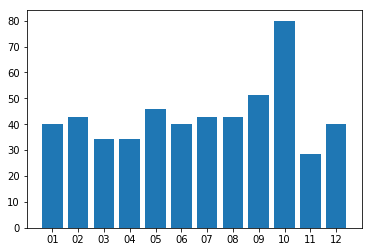

In the year 2013 month in which max no of unique clients conatcted is: 10 with 88.5714 percentage 


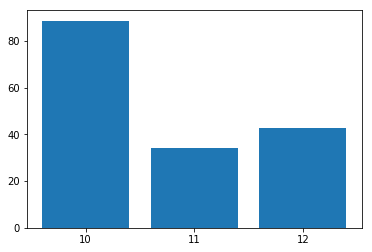

In the year 2016 month in which max no of unique clients conatcted is: 10 with 71.4286 percentage 


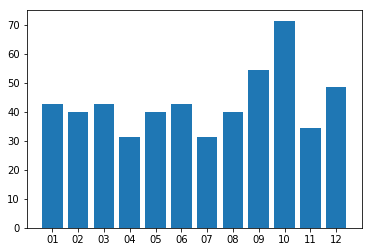

In the year 2014 month in which max no of unique clients conatcted is: 10 with 80.0 percentage 


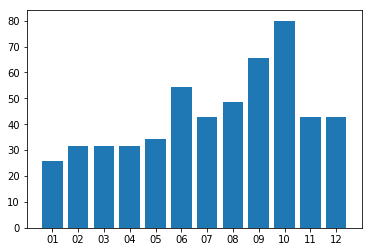

In the year 2017 month in which max no of unique clients conatcted is: 09 with 60.0 percentage 


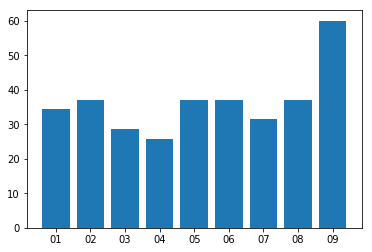

In [78]:
perc_contact_clients_month_year()

## Hence we can conclue that October is the month where all 35 unique clients are contacted

### Lets if MLE says the same thing or not?

In [79]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
# fit the data to the gamma distribution:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(df_unique_client_month['Unique Client Count'])
print(fit_alpha, fit_loc, fit_beta)

225.59140085899878 -7.685349701815216 0.17228288218482202


/Users/vaishalilambe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


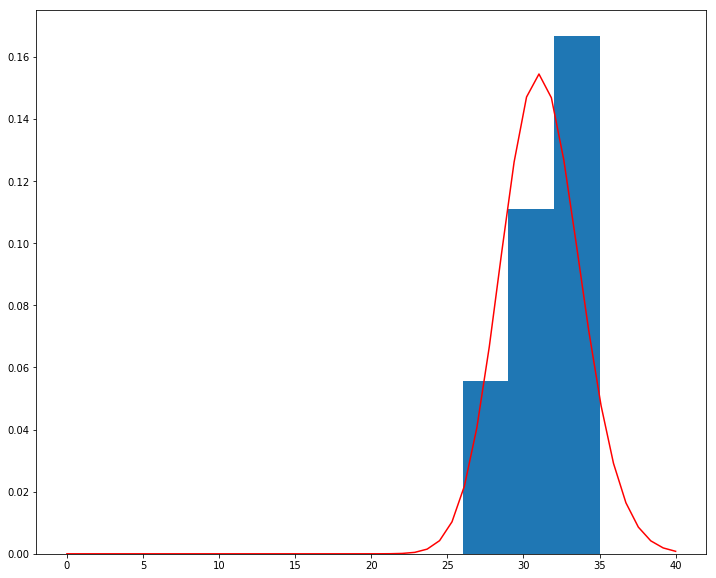

In [81]:
# plot the data and its MLE-derived model
import numpy as np
import matplotlib.pyplot as plt
model = stats.gamma(fit_alpha, loc=fit_loc, scale=fit_beta)  
plt.figure(figsize=(12,10))
_ = plt.hist(df_unique_client_month['Unique Client Count'], bins=3, normed=True)
x = np.linspace(0,40)
__ = plt.plot(x, model.pdf(x), color='red')

In [82]:

# fit the data to the gamma distribution:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(df_unique_client_month['Month'].astype(int))
print(fit_alpha, fit_loc, fit_beta)

400006841.6834152 -69036.1295387157 0.0001726036213873652


/Users/vaishalilambe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


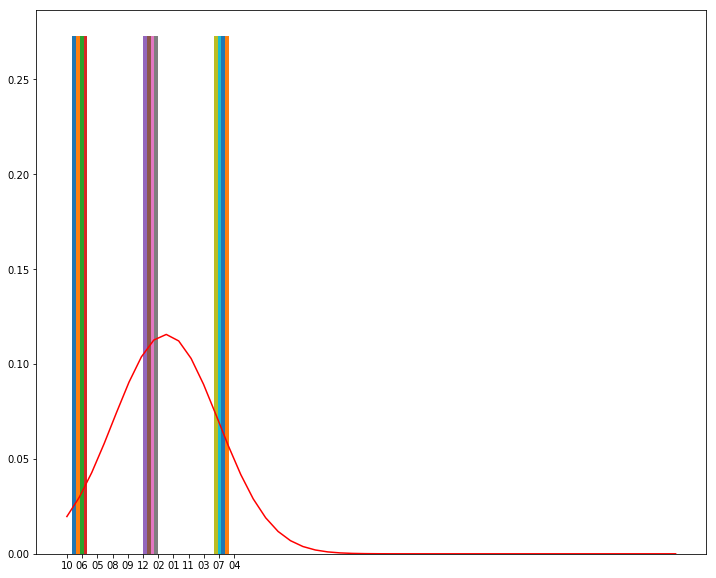

In [85]:
# plot the data and its MLE-derived model
import numpy as np
import matplotlib.pyplot as plt
model = stats.gamma(fit_alpha, loc=fit_loc, scale=fit_beta)  
plt.figure(figsize=(12,10))
_ = plt.hist(df_unique_client_month['Month'], bins=3, normed=True)
x = np.linspace(0,40)
__ = plt.plot(x, model.pdf(x), color='red')